In [26]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
Datos=pd.read_csv(r"C:\Users\ANALISIS DE DATOS\Documents\starbucks.csv", sep=",")
Datos.sample(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
209,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,240,5,3.5,0.1,10,170,47,1,44,4.0,4%,0%,8%,20%,75
113,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,240,4.5,2.0,0.1,20,115,45,0,42,8.0,10%,0%,25%,2%,95
57,Classic Espresso Drinks,Espresso,Doppio,10,0,0.0,0.0,0,1,2,0,0,1.0,0%,0%,0%,0%,150
125,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,350,8,4.0,0.2,30,180,57,1,55,14.0,20%,15%,45%,4%,80
139,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Venti Nonfat Milk,190,0.2,0.1,0.0,5,110,39,0,39,9.0,15%,0%,30%,0.00%,varies


In [5]:
Datos.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [25]:
Cafeina=Datos["Caffeine (mg)"]
lista_de_valores=Datos["Caffeine (mg)"].dropna().tolist()
for idx, valor in Cafeina.items():
    if pd.isna(valor):
        indice=random.randint(0, len(lista_de_valores)-1)
        Datos.at[idx, "Caffeine (mg)"]=lista_de_valores[indice]
Datos.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

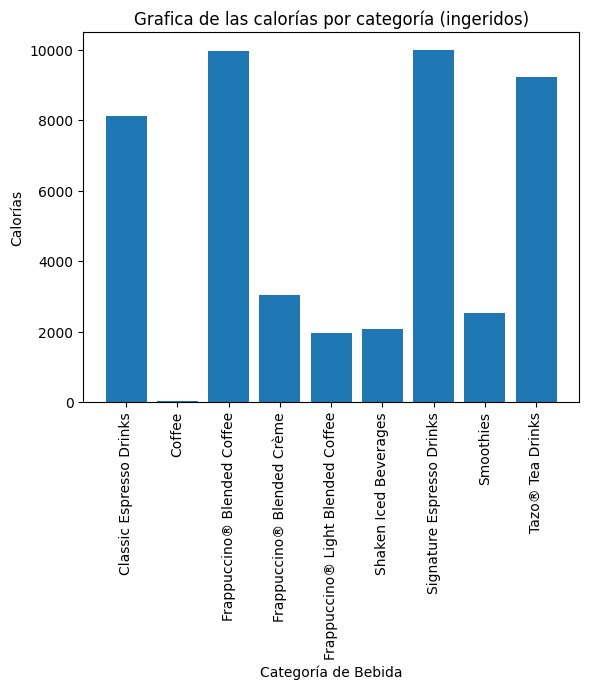

In [68]:
calorias = Datos.groupby('Beverage_category')['Calories'].sum().to_dict()
plt.bar(calorias.keys(), calorias.values())
plt.xlabel('Categoría de Bebida')
plt.ylabel('Calorías')
plt.title('Grafica de las calorías por categoría (ingeridos)')
plt.xticks(rotation=90)
plt.show()


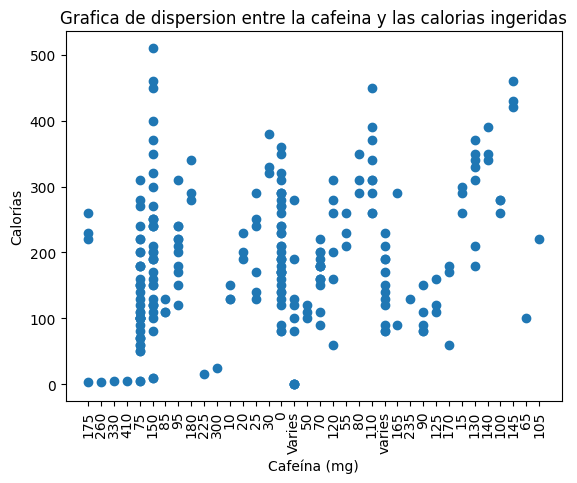

In [67]:
Cafeina=Datos["Caffeine (mg)"]
Calorias=Datos["Calories"]
# Crear gráfico de dispersión
plt.scatter(Cafeina, Calorias)
plt.xlabel('Cafeína (mg)')
plt.ylabel('Calorías')
plt.title('Grafica de dispersion entre la cafeina y las calorias ingeridas')
plt.xticks(rotation=90)
plt.show()

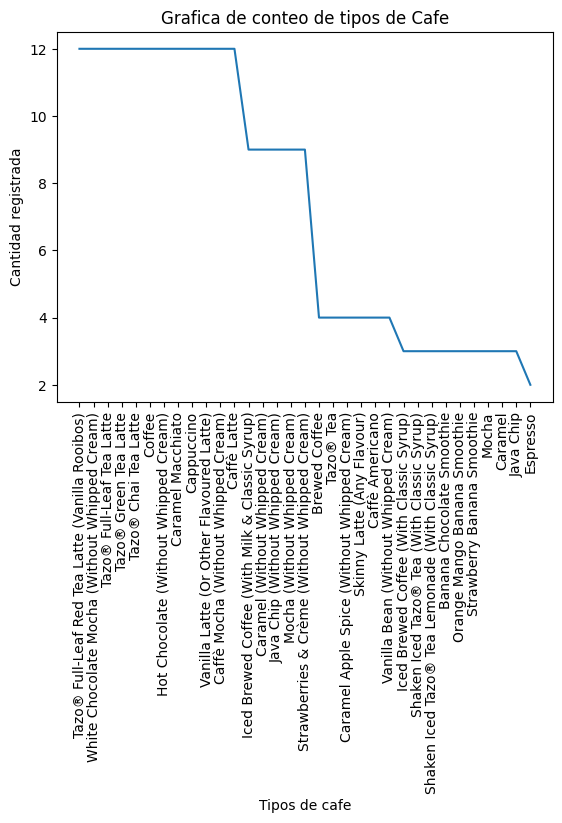

In [66]:
tipo_cafe=Datos["Beverage"].value_counts()
plt.plot(tipo_cafe)
plt.ylabel('Cantidad registrada')
plt.xlabel("Tipos de cafe")
plt.title('Grafica de conteo de tipos de Cafe')
plt.xticks(rotation=90)
plt.show()

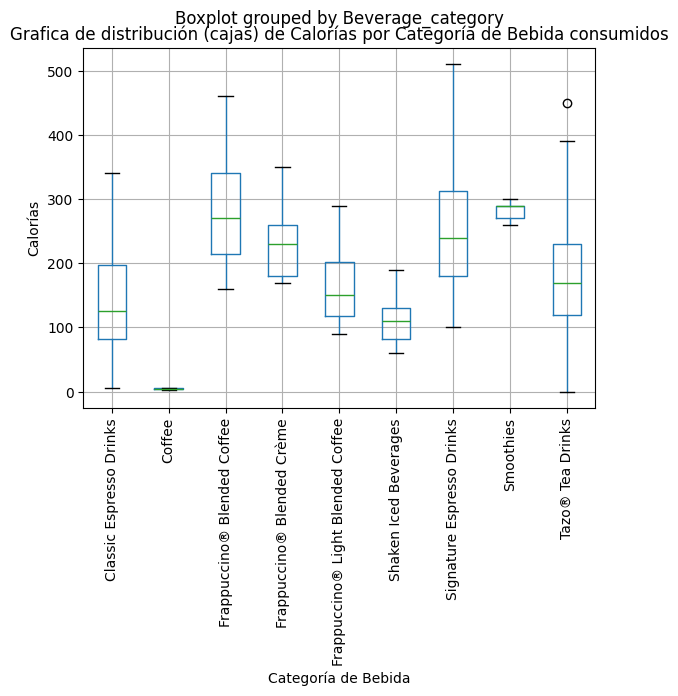

In [77]:
Datos.boxplot(column='Calories', by='Beverage_category')
plt.title('Grafica de distribución (cajas) de Calorías por Categoría de Bebida consumidos')
plt.xlabel('Categoría de Bebida')
plt.ylabel('Calorías')
plt.xticks(rotation=90)
plt.show()

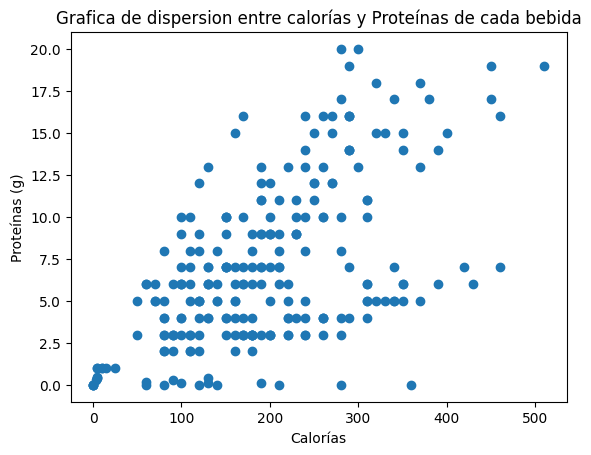

In [78]:
plt.scatter(Datos['Calories'], Datos[' Protein (g) '])
plt.title('Grafica de dispersion entre calorías y Proteínas de cada bebida')
plt.xlabel('Calorías')
plt.ylabel('Proteínas (g)')
plt.show()

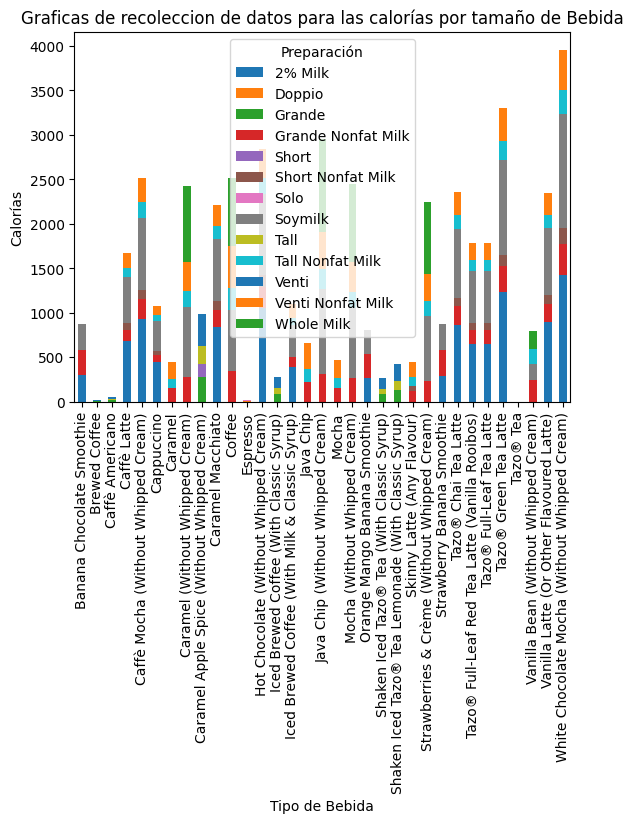

In [79]:

Datos.pivot_table(index='Beverage', columns='Beverage_prep', values='Calories', aggfunc='sum').plot(kind='bar', stacked=True)
plt.title('Graficas de recoleccion de datos para las calorías por tamaño de Bebida')
plt.xlabel('Tipo de Bebida')
plt.ylabel('Calorías')
plt.xticks(rotation=90)
plt.legend(title='Preparación')
plt.show()

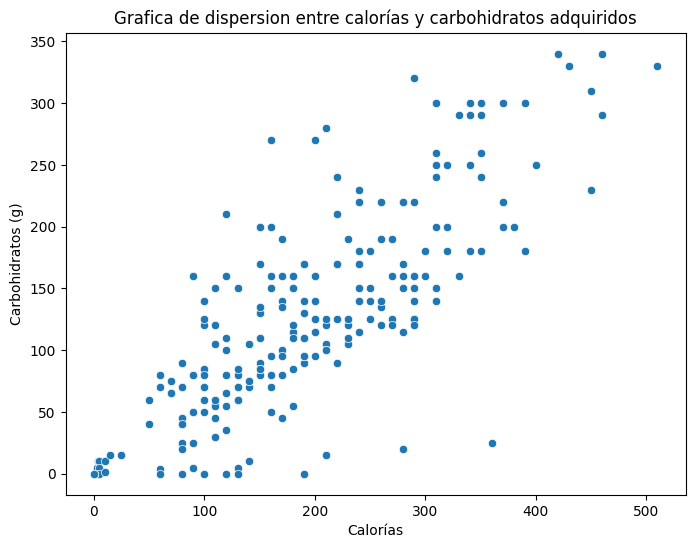

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Calories', y=' Total Carbohydrates (g) ', data=Datos)
plt.title('Grafica de dispersion entre calorías y carbohidratos adquiridos')
plt.xlabel('Calorías')
plt.ylabel('Carbohidratos (g)')
plt.show()

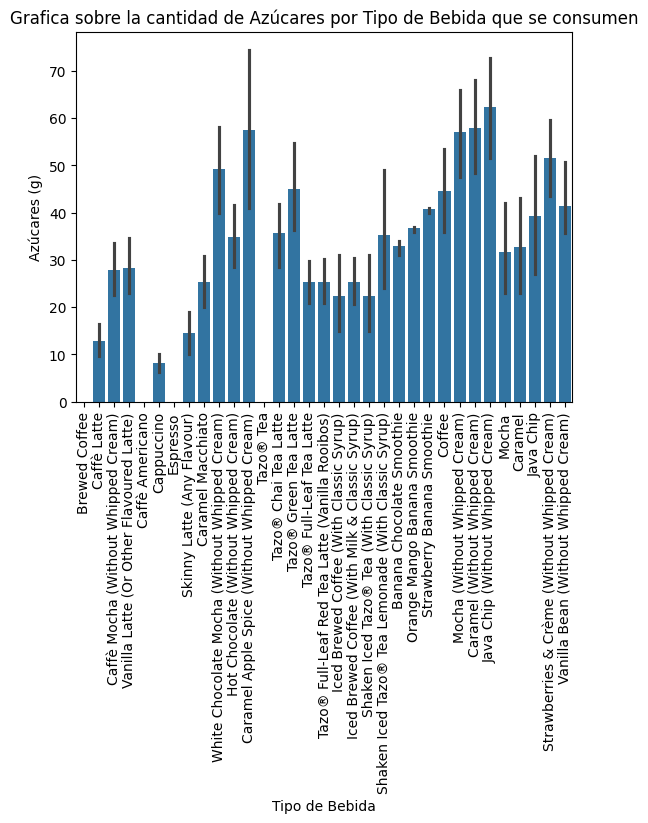

In [83]:
sns.barplot(x='Beverage', y=' Sugars (g)', data=Datos)
plt.title('Grafica sobre la cantidad de Azúcares por Tipo de Bebida que se consumen')
plt.xlabel('Tipo de Bebida')
plt.ylabel('Azúcares (g)')
plt.xticks(rotation=90)
plt.show()

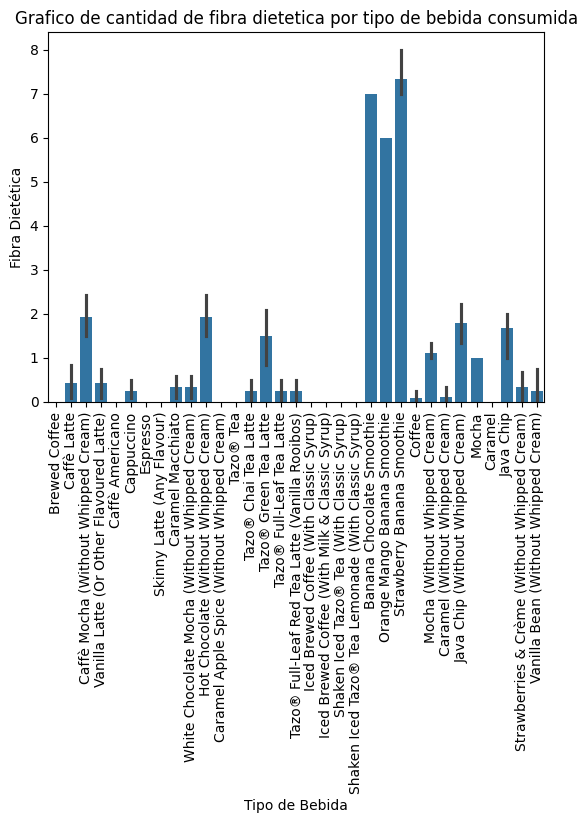

In [85]:
sns.barplot(x='Beverage', y=' Dietary Fibre (g)', data=Datos)
plt.title('Grafico de cantidad de fibra dietetica por tipo de bebida consumida')
plt.xlabel('Tipo de Bebida')
plt.ylabel('Fibra Dietética')
plt.xticks(rotation=90)
plt.show()

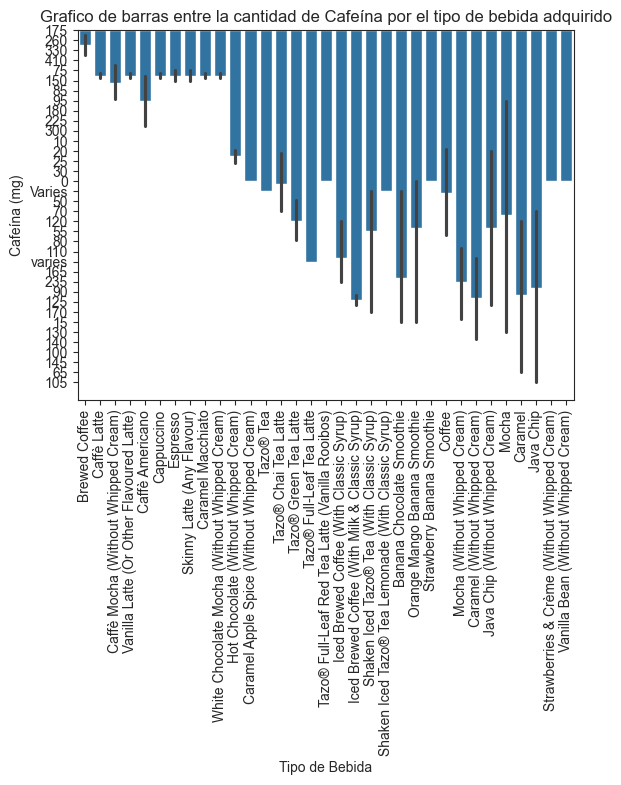

In [92]:
sns.set_style(style="ticks")
sns.barplot(x='Beverage', y='Caffeine (mg)', data=Datos)
plt.title('Grafico de barras entre la cantidad de Cafeína por el tipo de bebida adquirido')
plt.xlabel('Tipo de Bebida')
plt.ylabel('Cafeína (mg)')
plt.xticks(rotation=90)
plt.show()